In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

# WNBA

In [7]:
wnba = pd.read_csv("wnba.csv")
wnba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          143 non-null    object 
 1   Team          143 non-null    object 
 2   Pos           143 non-null    object 
 3   Height        143 non-null    int64  
 4   Weight        142 non-null    float64
 5   BMI           142 non-null    float64
 6   Birth_Place   143 non-null    object 
 7   Birthdate     143 non-null    object 
 8   Age           143 non-null    int64  
 9   College       143 non-null    object 
 10  Experience    143 non-null    object 
 11  Games Played  143 non-null    int64  
 12  MIN           143 non-null    int64  
 13  FGM           143 non-null    int64  
 14  FGA           143 non-null    int64  
 15  FG%           143 non-null    float64
 16  15:00         143 non-null    int64  
 17  3PA           143 non-null    int64  
 18  3P%           143 non-null    

In [6]:
wnba.shape

(143, 32)

## Sampling

In [16]:
games_played = wnba['Games Played']
parameter = games_played.max()
parameter

32

In [13]:
sample = games_played.sample(30, random_state=1)
statistic = sample.max()
statistic

30

In [15]:
sampling_error = parameter - statistic

### Random Sampling

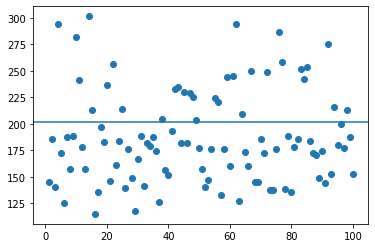

In [19]:
avg_points = []
for i in range(100):
    sample = wnba.PTS.sample(10, random_state=i)
    mean = sample.mean()
    avg_points.append(mean)

plt.scatter(x=range(1, 101), y=avg_points)
plt.axhline(wnba.PTS.mean())

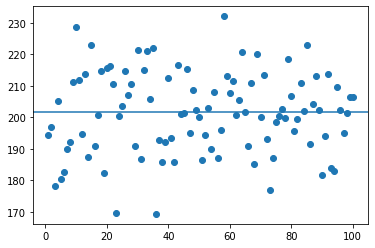

In [20]:
avg_points = []
for i in range(100):
    sample = wnba.PTS.sample(80, random_state=i)
    mean = sample.mean()
    avg_points.append(mean)

plt.scatter(x=range(1, 101), y=avg_points)
plt.axhline(wnba.PTS.mean())

In [22]:
wnba.Pos.value_counts()

G      60
F      33
C      25
G/F    13
F/C    12
Name: Pos, dtype: int64

### Stratified sampling

In [31]:
wnba['points_per_game'] = wnba.PTS / wnba['Games Played']
positions = wnba.Pos.unique()
stratas = {}
for position in positions:
    stratas[position] = wnba[wnba.Pos == position]

In [45]:
results = {}
for strata in stratas.items():
    position = strata[0]
    sample = strata[1].sample(10, random_state=0)
    mean_ppg = sample.points_per_game.mean()
    results[position] = mean_ppg

In [46]:
# Position with most points
max(results, key=results.get)

'C'